K=3 -> Accuracy: 0.91


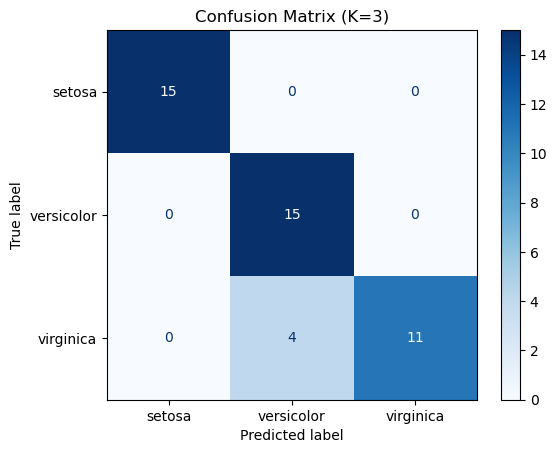

K=5 -> Accuracy: 0.91


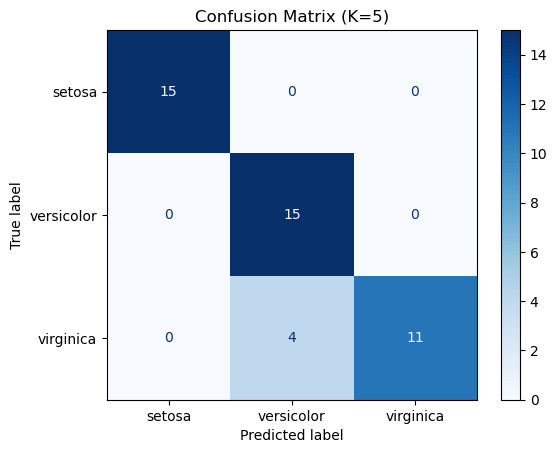

K=7 -> Accuracy: 0.93


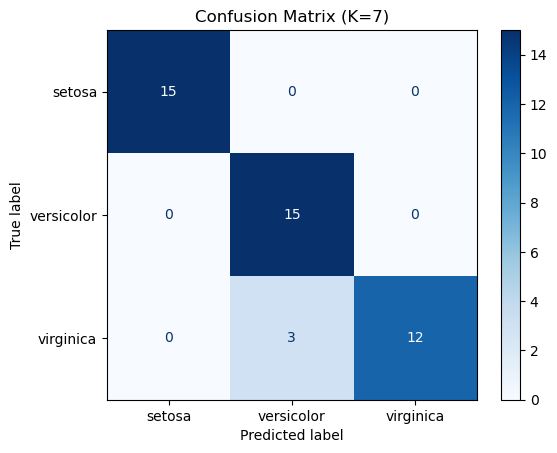

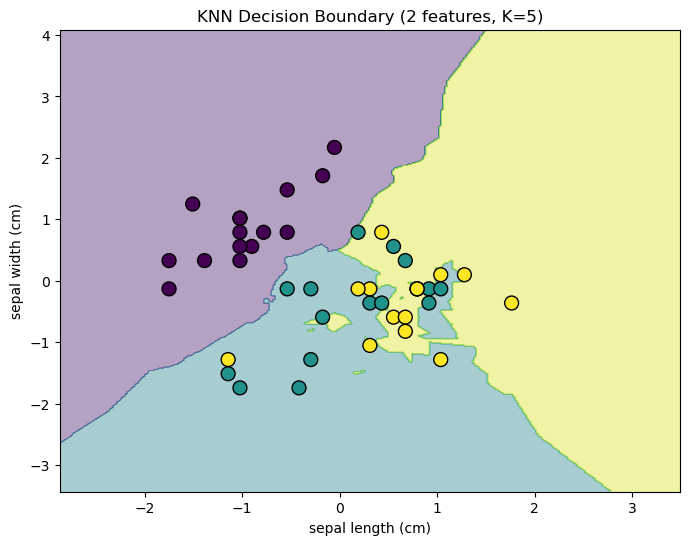

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 2. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 4. Train and evaluate for different K
k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} -> Accuracy: {acc:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (K={k})")
    plt.show()

# 5. Decision boundary visualization (only 2 features for 2D plot)
X_2D = X_scaled[:, :2]  # use first two features
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2D, y, test_size=0.3, random_state=42, stratify=y)

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2, y_train2)

# meshgrid
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_test2, edgecolor='k', marker='o', s=100)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("KNN Decision Boundary (2 features, K=5)")
plt.show()
